In [0]:
# !pip install --upgrade tensorflow
# !pip install tensorflow==1.4

In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
import matplotlib.pyplot as plt

In [0]:
mnist_shape = (28,28,1)
mnist_classes = 10

In [0]:
model_D = models.Sequential()

model_D.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=mnist_shape))
model_D.add(layers.BatchNormalization())
model_D.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model_D.add(layers.BatchNormalization())
model_D.add(layers.MaxPool2D((2, 2), strides=2, padding='same'))

model_D.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model_D.add(layers.BatchNormalization())
model_D.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model_D.add(layers.BatchNormalization())
model_D.add(layers.MaxPool2D((2, 2), strides=2, padding='same'))

model_D.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model_D.add(layers.BatchNormalization())
model_D.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model_D.add(layers.BatchNormalization())
model_D.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model_D.add(layers.BatchNormalization())
model_D.add(layers.MaxPool2D((2, 2), strides=2, padding='same'))

model_D.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model_D.add(layers.BatchNormalization())
model_D.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model_D.add(layers.BatchNormalization())
model_D.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model_D.add(layers.BatchNormalization())
model_D.add(layers.MaxPool2D((2, 2), strides=2, padding='same'))

model_D.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model_D.add(layers.BatchNormalization())
model_D.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model_D.add(layers.BatchNormalization())
model_D.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model_D.add(layers.BatchNormalization())
model_D.add(layers.MaxPool2D((2, 2), strides=2, padding='same'))
model_D.add(layers.Dropout(0.5))

model_D.add(layers.Flatten())
model_D.add(layers.Dense(4096, activation='relu'))
model_D.add(layers.Dense(4096, activation='relu'))
model_D.add(layers.Dense(mnist_classes, activation='softmax'))

model_D.summary()
# Total params: 138,357,544 for ILSVRC
# Total params: 33,638,218 for CIFAR
# Total params: 33,637,066 for MNIST

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_13 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_14 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
batch_normalization_15 (Batc (None, 14, 14, 128)      

## MNIST

In [0]:
(train_images_mnist, train_labels_mnist), (test_images_mnist, test_labels_mnist) = datasets.mnist.load_data(path='mnist.npz')

# Normalize pixel values to be between 0 and 1
train_images_mnist, test_images_mnist = train_images_mnist / 255.0, test_images_mnist / 255.0

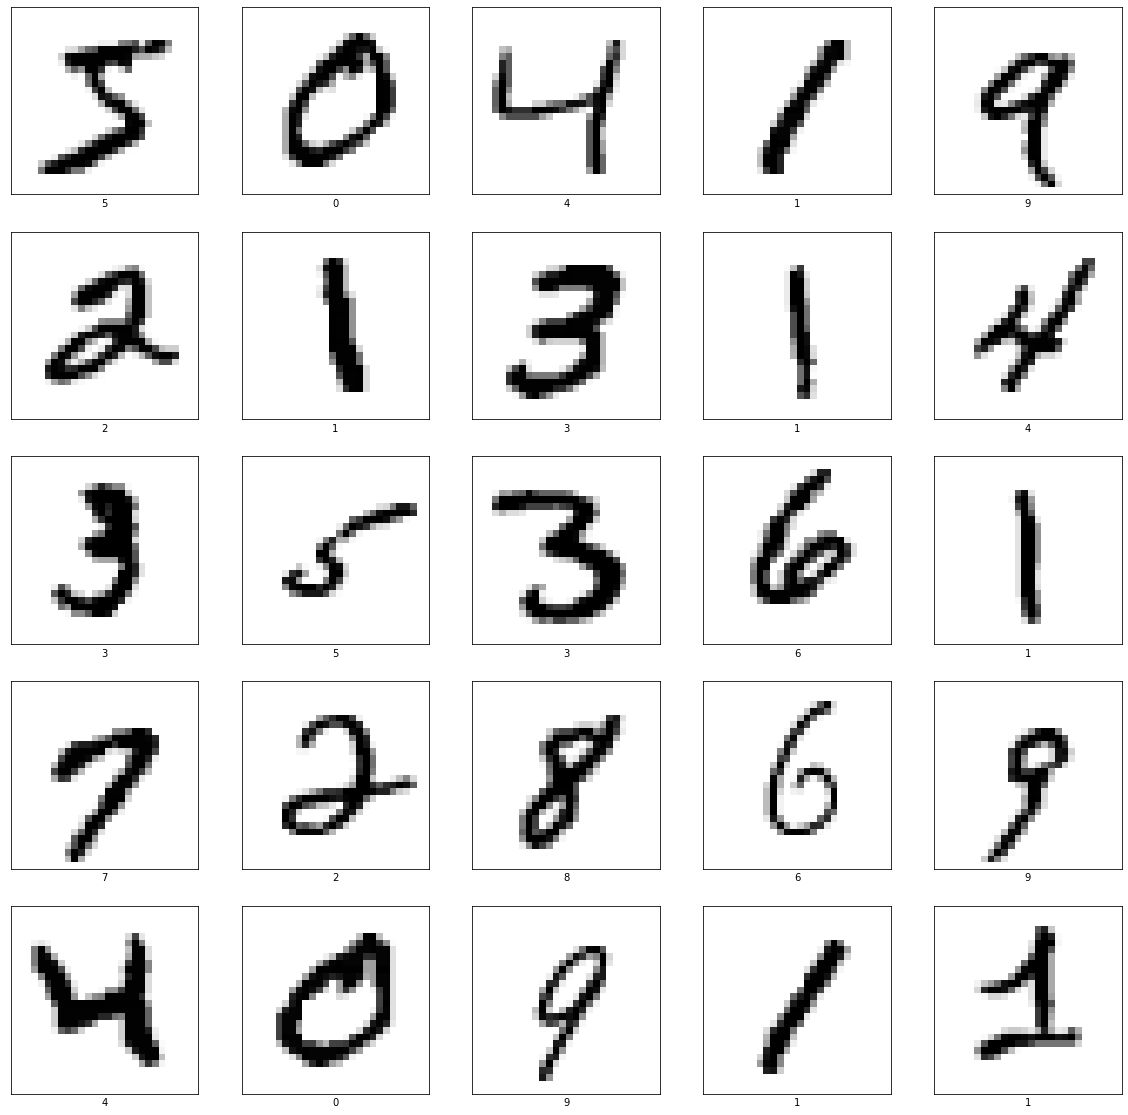

In [0]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_mnist[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels_mnist[i]])
plt.show()

In [0]:
# reshape dataset to have a single channel
train_images_mnist = train_images_mnist.reshape((train_images_mnist.shape[0], 28, 28, 1))
test_images_mnist = test_images_mnist.reshape((test_images_mnist.shape[0], 28, 28, 1))

# print(train_images_mnist.shape)
# print(test_images_mnist)
print('test_images_mnist:', test_images_mnist.shape)
print('test_labels_mnist:', test_labels_mnist.shape)


test_images_mnist: (10000, 28, 28, 1)
test_labels_mnist: (10000,)


In [0]:
sgd = optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model_D.compile(optimizer=sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model_D.fit(train_images_mnist, 
                      train_labels_mnist, 
                      batch_size=256,
                      epochs=200,
                      validation_data=(test_images_mnist, test_labels_mnist))

Epoch 1/200
  1/235 [..............................] - ETA: 0s - loss: 2.2970 - accuracy: 0.1211

KeyboardInterrupt: ignored

In [0]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()